In [196]:
#Load the necessary programs
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import csv

In [197]:
#Load the file
test_dataset = pd.read_csv("test.csv")
train_dataset = pd.read_csv("train.csv")

In [198]:
test_dataset.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [199]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [200]:
#drop the Name, Ticket, Cabin from the train and test dataset
train_dataset = train_dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_dataset = test_dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [201]:
#fill na values in the age and fare column
train_dataset['Age'] = train_dataset['Age'].fillna(train_dataset['Age'].dropna().mean())
train_dataset['Fare'] = train_dataset['Fare'].fillna(train_dataset['Fare'].dropna().mean())

test_dataset['Age'] = test_dataset['Age'].fillna(test_dataset['Age'].dropna().mean())
test_dataset['Fare'] = test_dataset['Fare'].fillna(test_dataset['Fare'].dropna().mean())

In [202]:
#one hot encode with sex
cleanup_sex = {"Sex": {"female": 1, "male": 0}}
train_dataset = train_dataset.replace(cleanup_sex)
test_dataset = test_dataset.replace(cleanup_sex)

#one hot encode embark
cleanup_embark = {"Embarked": {"C": 0, "Q": 1, "S": 2}}
train_dataset = train_dataset.replace(cleanup_embark)
test_dataset = test_dataset.replace(cleanup_embark)

C:\Users\Jon\AppData\Local\Temp\ipykernel_29508\1641757497.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_dataset = train_dataset.replace(cleanup_sex)
C:\Users\Jon\AppData\Local\Temp\ipykernel_29508\1641757497.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_dataset = test_dataset.replace(cleanup_sex)
C:\Users\Jon\AppData\Local\Temp\ipykernel_29508\1641757497.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

In [203]:
#drop empty values
train_dataset = train_dataset[train_dataset['Embarked'].notna()]

In [205]:
#split the dataset into the appropriate parts
x_train = train_dataset.drop(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch'], axis=1)
x_test = test_dataset.drop(['PassengerId', 'Age', 'SibSp', 'Parch'], axis=1)
y_train = train_dataset['Survived']

In [206]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [207]:
print(train_dataset.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool


In [208]:
print(test_dataset.isnull().any())

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool


In [209]:
x_train = np.asarray(x_train).astype("float32")
x_test = np.asarray(x_test).astype("float32")
y_train = np.asarray(y_train).astype("float32")

In [210]:
#normalize the data
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

In [211]:
print(np.any(np.isnan(x_test)))

False


In [212]:
partial_x_train = x_train[200:]
partial_y_train = y_train[200:]
partial_x_val = x_train[:200]
partial_y_val = y_train[:200]

In [213]:
print(len(x_train))

889


In [214]:
#build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="softmax")
    ])
    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [215]:
#Train the model and save the history
model = build_model()
history = model.fit(partial_x_train, partial_y_train, epochs=1000, batch_size=256, validation_data=(partial_x_val, partial_y_val))

Epoch 1/1000
3/3 [==============================] - 1s 80ms/step - loss: 0.6635 - accuracy: 0.6401 - val_loss: 0.6204 - val_accuracy: 0.6900
Epoch 2/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.5918 - accuracy: 0.7649 - val_loss: 0.5834 - val_accuracy: 0.7500
Epoch 3/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.5514 - accuracy: 0.8055 - val_loss: 0.5520 - val_accuracy: 0.7650
Epoch 4/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.5213 - accuracy: 0.8070 - val_loss: 0.5296 - val_accuracy: 0.7750
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4991 - accuracy: 0.8113 - val_loss: 0.5130 - val_accuracy: 0.7750
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4848 - accuracy: 0.8084 - val_loss: 0.5012 - val_accuracy: 0.7750
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4739 - accuracy: 0.8113 - val_loss: 0.4955 - val_accuracy: 0.7850
Epoch 8/1000


In [216]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

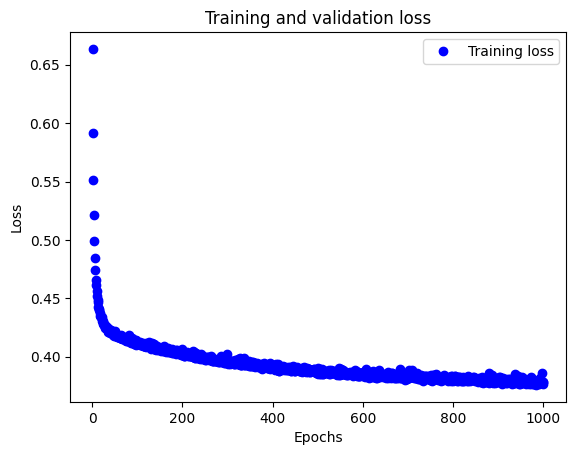

In [217]:
#plotting loss and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

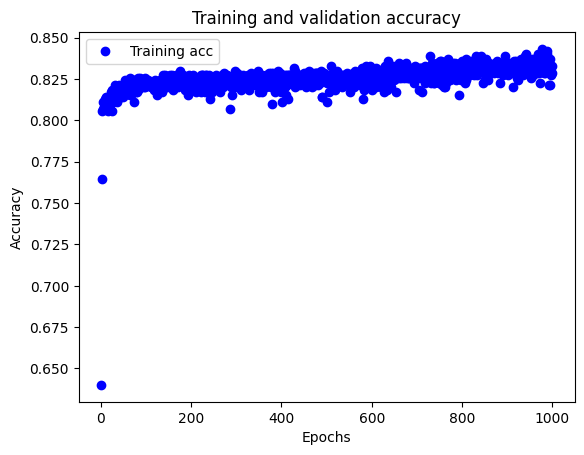

In [218]:
#plotting training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [219]:
#make the predictions
predictions = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [220]:
#print the predictions
print(predictions[:10])

[[0.90693575 0.09306423]
 [0.5792636  0.42073637]
 [0.9480501  0.05194985]
 [0.8607286  0.13927135]
 [0.52087843 0.47912157]
 [0.85973966 0.14026037]
 [0.3732754  0.6267246 ]
 [0.7919712  0.20802885]
 [0.20793837 0.7920616 ]
 [0.8646584  0.13534158]]


In [221]:
survived_predictions = []
for i in range(len(predictions)):
    guess = predictions[i].argmax()
    survived_predictions.append(guess)
print(survived_predictions[:10])

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


In [222]:
file_name = "titanic_predictions_nn.csv"
fields = ['PassengerId', 'Survived']
passengerid_list = test_dataset['PassengerId']
with open(file_name, "w", newline='') as csvfile:
    csvwriter = csv.DictWriter(csvfile, fieldnames=fields)
    csvwriter.writeheader()
    for i in range(len(x_test)):
        csvwriter.writerow({'PassengerId': passengerid_list[i], 'Survived': survived_predictions[i]})